<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_07/cosine_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Vector_Similarity_Measures_Cosine_Similarity**
<img src='https://assets.zilliz.com/Vector_Similarity_Measures_Cosine_Zilliz_f3ebfcfd7e.png'>

In [1]:
import numpy as np
import math

# 벡터의 내적(dot product) 계산 함수
def dot_product(vec_a, vec_b):
    if len(vec_a) != len(vec_b):
        raise ValueError("벡터의 길이가 동일해야 합니다.")

    result = 0
    for i in range(len(vec_a)):
        result += vec_a[i] * vec_b[i]

    return result

# 벡터의 크기(magnitude, norm) 계산 함수
def magnitude(vec):
    sum_of_squares = 0
    for i in range(len(vec)):
        sum_of_squares += vec[i] ** 2

    return math.sqrt(sum_of_squares)

# 코사인 유사도 계산 함수
def cosine_similarity(vec_a, vec_b):
    dot = dot_product(vec_a, vec_b)
    mag_a = magnitude(vec_a)
    mag_b = magnitude(vec_b)

    if mag_a == 0 or mag_b == 0:
        raise ValueError("영벡터(크기가 0인 벡터)의 코사인 유사도는 정의되지 않습니다.")

    return dot / (mag_a * mag_b)

# NumPy를 사용한 계산 함수들
def np_dot_product(vec_a, vec_b):
    return np.dot(vec_a, vec_b)

def np_magnitude(vec):
    return np.linalg.norm(vec)

def np_cosine_similarity(vec_a, vec_b):
    return np.dot(vec_a, vec_b) / (np.linalg.norm(vec_a) * np.linalg.norm(vec_b))

def print_results(name, vec_a, vec_b):
    print(f"===== {name} =====")
    print(f"벡터 A: {vec_a}")
    print(f"벡터 B: {vec_b}")

    # 직접 구현한 함수 사용
    dot = dot_product(vec_a, vec_b)
    mag_a = magnitude(vec_a)
    mag_b = magnitude(vec_b)
    cos_sim = cosine_similarity(vec_a, vec_b)

    print("\n[직접 구현한 함수 결과]")
    print(f"내적: {dot}")
    print(f"벡터 A의 크기: {mag_a}")
    print(f"벡터 B의 크기: {mag_b}")
    print(f"코사인 유사도: {cos_sim}")

    # 코사인 유사도에서 각도 계산
    angle_rad = math.acos(min(1.0, max(-1.0, cos_sim)))  # 수치 오차 방지
    angle_deg = angle_rad * (180 / math.pi)
    print(f"각도(라디안): {angle_rad}")
    print(f"각도(도): {angle_deg}")

    # NumPy 함수 사용
    np_dot = np_dot_product(vec_a, vec_b)
    np_mag_a = np_magnitude(vec_a)
    np_mag_b = np_magnitude(vec_b)
    np_cos_sim = np_cosine_similarity(vec_a, vec_b)

    print("\n[NumPy 함수 결과]")
    print(f"내적: {np_dot}")
    print(f"벡터 A의 크기: {np_mag_a}")
    print(f"벡터 B의 크기: {np_mag_b}")
    print(f"코사인 유사도: {np_cos_sim}")
    print("\n")


In [7]:
# 예제 1: 동일한 방향의 벡터
vec1 = [1, 4]
vec2 = [3, 8]  # vec1의 스칼라 배
print_results("동일한 방향의 벡터", vec1, vec2)

===== 동일한 방향의 벡터 =====
벡터 A: [1, 4]
벡터 B: [3, 8]

[직접 구현한 함수 결과]
내적: 35
벡터 A의 크기: 4.123105625617661
벡터 B의 크기: 8.54400374531753
코사인 유사도: 0.9935326726564043
각도(라디안): 0.11379200714370685
각도(도): 6.5198017516569164

[NumPy 함수 결과]
내적: 35
벡터 A의 크기: 4.123105625617661
벡터 B의 크기: 8.54400374531753
코사인 유사도: 0.9935326726564043




In [12]:
# 예제 2: 직각인 벡터
vec3 = [1, 0,]
vec4 = [0, 1,]
print_results("직각인 벡터", vec3, vec4)

# 예제 3: 반대 방향의 벡터
vec5 = [1, 2]
vec6 = [-1, -2]
print_results("반대 방향의 벡터", vec5, vec6)


===== 직각인 벡터 =====
벡터 A: [1, 0]
벡터 B: [0, 1]

[직접 구현한 함수 결과]
내적: 0
벡터 A의 크기: 1.0
벡터 B의 크기: 1.0
코사인 유사도: 0.0
각도(라디안): 1.5707963267948966
각도(도): 90.0

[NumPy 함수 결과]
내적: 0
벡터 A의 크기: 1.0
벡터 B의 크기: 1.0
코사인 유사도: 0.0


===== 반대 방향의 벡터 =====
벡터 A: [1, 2]
벡터 B: [-1, -2]

[직접 구현한 함수 결과]
내적: -5
벡터 A의 크기: 2.23606797749979
벡터 B의 크기: 2.23606797749979
코사인 유사도: -0.9999999999999998
각도(라디안): 3.1415926325163688
각도(도): 179.99999879258172

[NumPy 함수 결과]
내적: -5
벡터 A의 크기: 2.23606797749979
벡터 B의 크기: 2.23606797749979
코사인 유사도: -0.9999999999999998




In [14]:
# 예제 4: 문서 유사도 응용 (단어 빈도 벡터)
# 문서 1: "나는 사과와 바나나를 좋아한다"
# 문서 2: "나는 사과를 매우 좋아한다"
# 단어 벡터: [나는, 사과, 바나나, 좋아한다, 매우]
doc1 = [1, 1, 1, 1, 0]
doc2 = [1, 1, 0, 1, 1]
print_results("문서 유사도 예제", doc1, doc2)


===== 문서 유사도 예제 =====
벡터 A: [1, 1, 1, 1, 0]
벡터 B: [1, 1, 0, 1, 1]

[직접 구현한 함수 결과]
내적: 3
벡터 A의 크기: 2.0
벡터 B의 크기: 2.0
코사인 유사도: 0.75
각도(라디안): 0.7227342478134157
각도(도): 41.40962210927086

[NumPy 함수 결과]
내적: 3
벡터 A의 크기: 2.0
벡터 B의 크기: 2.0
코사인 유사도: 0.75




In [15]:
! pip install konlpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 23.8 MB/s eta 0:00:00


In [17]:
# 예제 1: 앞서 사용했던 예제
doc1 = "나는 사과와 바나나를 좋아한다"
doc2 = "나는 사과를 매우 좋아한다"

In [40]:
# prompt: doc1, doc2에서 추출한 후 countevector를 만들어라

from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

okt = Okt()

def build_count_vectorizer(docs):
    vectorizer = CountVectorizer()
    vectorizer.fit(docs)
    return vectorizer

def get_count_vectors(vectorizer, docs):
    return vectorizer.transform(docs).toarray()

doc1 = "나는 사과와 바나나를 좋아한다"
doc2 = "나는 사과를 매우 좋아한다"

docs = [doc1, doc2]
docs

['나는 사과와 바나나를 좋아한다', '나는 사과를 매우 좋아한다']

In [35]:
# CountVectorizer 생성
vectorizer = build_count_vectorizer(docs)

# Count Vectors 계산
count_vectors = get_count_vectors(vectorizer, docs)

print("Count Vectors:")
print(count_vectors)
print("\nVocabulary:")
vectorizer.vocabulary_

Count Vectors:
[[1 1 1 1]
 [1 1 1 1]]

Vocabulary:


{'나는': 0, '사과와': 2, '바나나를': 1, '좋아한다': 3}

In [36]:
count_vectors

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

In [37]:
count_vectors[0]

array([1, 1, 1, 1])

In [38]:
count_vectors[1]

array([1, 1, 1, 1])

In [39]:
np_cosine_similarity(count_vectors[0], count_vectors[1])

np.float64(1.0)

## **실습하기**
### **아래 문장끼리의 코사인 유사도를 구하라**

In [ ]:
# 예제 2: 주제가 비슷한 다른 문장
doc3 = "인공지능 기술은 빠르게 발전하고 있다"
doc4 = "인공지능의 발전 속도는 매우 빠르다"

# 예제 3: 주제가 다른 문장
doc5 = "오늘 날씨가 매우 좋아서 산책을 했다"
doc6 = "인공지능 기술은 우리의 삶을 변화시킨다"

# 예제 4: 복잡한 문장들
doc7 = "한국의 전통 음식에는 김치, 불고기, 비빔밥 등이 있으며 세계적으로 인기가 높아지고 있다"
doc8 = "김치와 비빔밥은 한국의 대표적인 음식으로 영양가가 높고 맛있다"

In [18]:

# 시각화 예제 (matplotlib 사용)
print("===== 2D 벡터 시각화 예제 =====")
import matplotlib.pyplot as plt

# 2D 벡터 정의
vec_a = [3, 4]
vec_b = [4, 3]

# 코사인 유사도 계산
cos_sim = cosine_similarity(vec_a, vec_b)
angle_rad = math.acos(cos_sim)
angle_deg = angle_rad * (180 / math.pi)

print(f"벡터 A: {vec_a}")
print(f"벡터 B: {vec_b}")
print(f"내적: {dot_product(vec_a, vec_b)}")
print(f"코사인 유사도: {cos_sim}")
print(f"각도(도): {angle_deg}")


===== 2D 벡터 시각화 예제 =====
벡터 A: [3, 4]
벡터 B: [4, 3]
내적: 24
코사인 유사도: 0.96
각도(도): 16.260204708311967


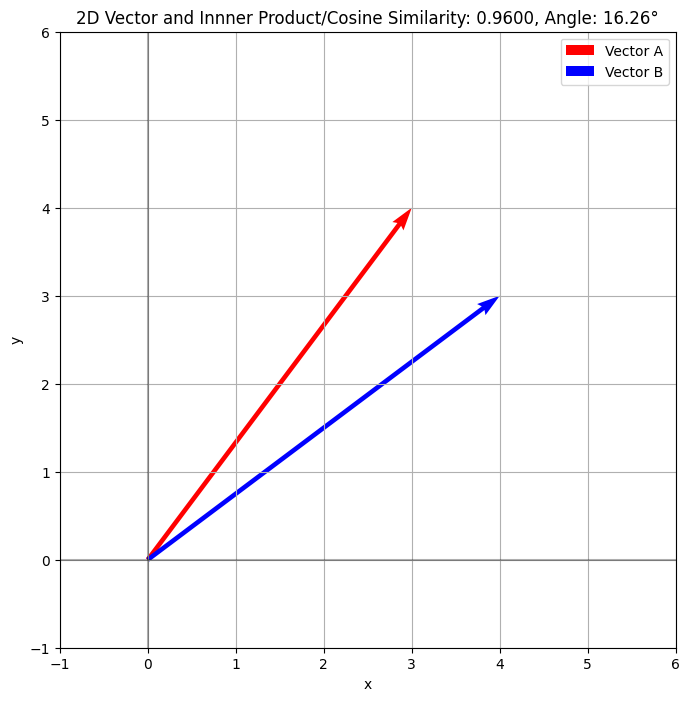


코사인 유사도 수식: cos(θ) = (A·B) / (|A|·|B|)
내적과 코사인 유사도의 관계:
- 내적(A·B)은 두 벡터의 각 성분을 곱한 후 합한 값
- 코사인 유사도는 내적을 두 벡터의 크기로 나눈 값
- 두 벡터가 완전히 같은 방향일 때: 코사인 유사도 = 1 (각도 0°)
- 두 벡터가 직각일 때: 코사인 유사도 = 0 (각도 90°)
- 두 벡터가 반대 방향일 때: 코사인 유사도 = -1 (각도 180°)


In [20]:

# 벡터 시각화 코드
plt.figure(figsize=(10, 8))
plt.quiver(0, 0, vec_a[0], vec_a[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
plt.quiver(0, 0, vec_b[0], vec_b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.grid()
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title(f'2D Vector and Innner Product/Cosine Similarity: {cos_sim:.4f}, Angle: {angle_deg:.2f}°')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.gca().set_aspect('equal')
# plt.savefig('cosine_similarity_visualization.png')
plt.show()  # 실제 실행 환경에서 그래프를 표시하려면 이 줄의 주석을 해제하세요

print("\n코사인 유사도 수식: cos(θ) = (A·B) / (|A|·|B|)")
print("내적과 코사인 유사도의 관계:")
print("- 내적(A·B)은 두 벡터의 각 성분을 곱한 후 합한 값")
print("- 코사인 유사도는 내적을 두 벡터의 크기로 나눈 값")
print("- 두 벡터가 완전히 같은 방향일 때: 코사인 유사도 = 1 (각도 0°)")
print("- 두 벡터가 직각일 때: 코사인 유사도 = 0 (각도 90°)")
print("- 두 벡터가 반대 방향일 때: 코사인 유사도 = -1 (각도 180°)")

## **[선형대수](https://amber-chaeeunk.tistory.com/69)**
<img src='https://blog.kakaocdn.net/dn/F84OW/btrblRGtEXQ/2FqWHniXPZzsROvuyunQF0/img.png'>